# CSC311 Project: sklearn decision tree


In [1]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library

In addition to using `numpy` for its linear algebra functionalities, we will also use
a library called `pandas` to help us read CSV files and manipulate tabular data.
The below code reads each of the csv files into a **data frame**, which is a way that
`pandas` stores tabular data.
As an added bonus, Jupyter notebooks display these data frames in a human-readable way.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


Use pandas to read the dataset.

NOTE: make sure to use flag **keep_default_na=False** when reading to keep 'None' as None instead of automatically converted to NaN

In [12]:
# ensure None values kept only in q8 column, but switched to NaN in others
na_values = ["None", "", "NA", "N/A", "null"]

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/cleaned_data.csv', na_values=na_values, keep_default_na=True)
data['Q8: How much hot sauce would you add to this food item?'] = data['Q8: How much hot sauce would you add to this food item?'].fillna("None")

# Display the first few rows of the DataFrame
data.head()

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6,"Week day lunch,At a party,Late night snack",5.0,cloudy with a chance of meatballs,coke,Friends,A little (mild),Pizza
1,715742,4,2,"Week day lunch,At a party,Late night snack",5.0,all sort of american young boy movies,coke,"Friends,Teachers,Strangers",none,Pizza
2,727333,3,5,"Week day lunch,Week day dinner,Weekend lunch,W...",10.0,action movie,coke,Friends,A moderate amount (medium),Pizza
3,606874,4,6,"Week day lunch,Week day dinner,Weekend lunch,W...",3.0,mamma mia,soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3,"Week day lunch,Week day dinner,Weekend lunch,W...",5.0,cloudy with a chance of meatballs,soda,"Siblings,Friends",A little (mild),Pizza


## Part 1. Data

In this lab, we will be looking at 10 features from the NHANES data set. We have done work to clean the data for you so that it is approachable, but we encourage you to take a look at the raw data as you are able.  The definitions of the features are as follows:

- `gender` (RIAGENDR): which is binary 2=female, 1=male
- `race_ethnicity` (RIDRETH3): which can be 1=mexican american, 2=other hispanic, 3=white, 4=black, 6=asian, ...
- `age` (RIDAGEYR): Age in years
- `drink_alcohol` (ALQ101): which is binary; 1 indicates the individual reportedly drinks alcohol and 2 indicates they do not
- `blood_cholesterol` (LBDTCSI): Results of an individual's blood cholesterol tests (mmol of cholesterol/L of blood)
- `blood_pressure_sys` (BPXSY1): an individual's systolic blood pressure
- `diastolic_bp` (BPXDI1): an individual's diastolic blood pressure
- `calories` (DR1TKCAL): the number of calories an individual eats per day
- `BMI` (BMXBMI): an individual's Body Mass Index (which can be used to assess obesity)
- `chest_pain_ever` (CDQ001): If an individual has ever reported chest pain.
- `family_income` (INDFMPIR): Ratio of a family's income to poverty threshold

We will be using these features to predict the column `target_heart`:

- `target_heart`: An individual reports that they have heart disease (1=yes, 0=no).


Let's start by exploring the data that we have in hand. Pandas has a nice function to summarize the mean and dispersion of each feature in our data frame:

In [13]:
data['Q2: How many ingredients would you expect this food item to contain?'] = pd.to_numeric(data['Q2: How many ingredients would you expect this food item to contain?'], errors='coerce')
data.describe()

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?
count,1644.000000,1644.000000,1632.000000
mean,581970.958029,3.174574,5.991422
std,125479.145414,1.021050,2.935844
min,5978.000000,1.000000,1.000000
25%,524483.750000,2.000000,4.000000
50%,617502.000000,3.000000,5.000000
75%,631686.250000,4.000000,7.000000
max,854745.000000,5.000000,25.000000



*  need to create script/functions to handle encoding categorical features as indicator variables

*   need to modify qs 3, 5, 6, 7, 8

  *   for q8, can set easily to numbers b/c by scale, similar to q1
      *   ie. None = 0, A little(mild) = 1, A moderate amount (medium) = 2, A lot(hot) = 3, I will have some of this food item with my hot sauce = ... wtf alice --> prob combine w/ moderate
  *   for q3 and 7, one-hot vector where each multiple choice option becomes new feature

  *   for q5 and 6, more complicated --> iterate through, keep track of answers and one-hot vector that way?


In [31]:
# One Hot Encoding way!!
# Rename columns for easier reference
df = data.rename(columns={
    'Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)': 'Q1',
    'Q2: How many ingredients would you expect this food item to contain?': 'Q2',
    'Q3: In what setting would you expect this food to be served? Please check all that apply': 'Q3',
    'Q4: How much would you expect to pay for one serving of this food item?': 'Q4',
    'Q5: What movie do you think of when thinking of this food item?': 'Q5',
    'Q6: What drink would you pair with this food item?': 'Q6',
    'Q7: When you think about this food item, who does it remind you of?': 'Q7',
    'Q8: How much hot sauce would you add to this food item?': 'Q8'
})

# Columns that need to be one-hot encoded
cols_to_expand = ['Q3', 'Q5', 'Q6', 'Q7']
features = ['Q1', 'Q2', 'Q4', 'Q8']

for col in cols_to_expand:
    df[col] = df[col].fillna('')
    dummies = df[col].str.get_dummies(sep=',')
    dummies = dummies.add_prefix(f"{col}_")
    features.extend(dummies.columns.tolist())
    df = df.drop(columns=[col]).join(dummies)

# Encoding Q8 (Hot Sauce Amount) as Ordinal
hot_sauce_map = {
    'None': 0,
    'A little (mild)': 1,
    'A moderate amount (medium)': 2,
    'A lot (hot)': 3,
    'I will have some of this food item with my hot sauce': 2
}
df['Q8'] = df['Q8'].map(hot_sauce_map)

# Ensure all Q8 values are numeric and replace any unmapped values
df['Q8'] = pd.to_numeric(df['Q8'], errors='coerce').fillna(0).astype(int)

# Encoding Target Variable (Label)
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# # Splitting Data for Training and Testing
# X = df.drop(columns=['Label'])
# y = df['Label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Ensure all feature values are numeric before training
# X_train = X_train.apply(pd.to_numeric, errors='coerce')
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# # Train Decision Tree Model
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # Evaluate Model
# train_acc = accuracy_score(y_train, clf.predict(X_train))
# test_acc = accuracy_score(y_test, clf.predict(X_test))

# print(f'Training Accuracy: {train_acc:.2f}')
# print(f'Testing Accuracy: {test_acc:.2f}')

# Splitting Data for Training, Validation, and Testing
# First split into train+val (80%) and test (20%)
X = df.drop(columns=['Label'])
y = df['Label']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split train+val into train (60%) and val (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Ensure all feature values are numeric before training
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Train Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model
train_acc = accuracy_score(y_train, clf.predict(X_train))
val_acc = accuracy_score(y_val, clf.predict(X_val))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print(f'Training Accuracy: {train_acc:.2f}')
print(f'Validation Accuracy: {val_acc:.2f}')
print(f'Testing Accuracy: {test_acc:.2f}')



Training Accuracy: 1.00
Validation Accuracy: 0.79
Testing Accuracy: 0.80


In [32]:
# Feature Encoding way!!
# Rename columns for easier reference
df = data.rename(columns={
    'Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)': 'Q1',
    'Q2: How many ingredients would you expect this food item to contain?': 'Q2',
    'Q3: In what setting would you expect this food to be served? Please check all that apply': 'Q3',
    'Q4: How much would you expect to pay for one serving of this food item?': 'Q4',
    'Q5: What movie do you think of when thinking of this food item?': 'Q5',
    'Q6: What drink would you pair with this food item?': 'Q6',
    'Q7: When you think about this food item, who does it remind you of?': 'Q7',
    'Q8: How much hot sauce would you add to this food item?': 'Q8'
})

# Columns that need different processing
cols_to_one_hot = ['Q3', 'Q7']  # These will be one-hot encoded
cols_for_frequency = ['Q5', 'Q6']  # These will use frequency counts
features = ['Q1', 'Q2', 'Q4', 'Q8']

# One-hot encode Q3 and Q7
for col in cols_to_one_hot:
    df[col] = df[col].fillna('')
    dummies = df[col].str.get_dummies(sep=',')
    dummies = dummies.add_prefix(f"{col}_")
    features.extend(dummies.columns.tolist())
    df = df.drop(columns=[col]).join(dummies)

# Frequency encoding for Q5 and Q6
for col in cols_for_frequency:
    # Count frequency of each response
    freq = df[col].value_counts(normalize=True)
    # Map each response to its frequency
    df[f"{col}_freq"] = df[col].map(freq)
    features.append(f"{col}_freq")
    df = df.drop(columns=[col])

# Encoding Q8 (Hot Sauce Amount) as Ordinal
hot_sauce_map = {
    'None': 0,
    'A little (mild)': 1,
    'A moderate amount (medium)': 2,
    'A lot (hot)': 3,
    'I will have some of this food item with my hot sauce': 2
}
df['Q8'] = df['Q8'].map(hot_sauce_map)

# Ensure all Q8 values are numeric and replace any unmapped values
df['Q8'] = pd.to_numeric(df['Q8'], errors='coerce').fillna(0).astype(int)

# Encoding Target Variable (Label)
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Splitting Data for Training, Validation, and Testing
# First split into train+val (80%) and test (20%)
X = df.drop(columns=['Label'])
y = df['Label']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split train+val into train (60%) and val (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Ensure all feature values are numeric before training
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Train Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model
train_acc = accuracy_score(y_train, clf.predict(X_train))
val_acc = accuracy_score(y_val, clf.predict(X_val))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print(f'Training Accuracy: {train_acc:.2f}')
print(f'Validation Accuracy: {val_acc:.2f}')
print(f'Testing Accuracy: {test_acc:.2f}')

Training Accuracy: 1.00
Validation Accuracy: 0.73
Testing Accuracy: 0.79


We will also declare a new array to store all the feature names. This will come in handy later when we visualize decision trees.

In [ ]:
# sort features list
features.sort(key=lambda x: (x.split("_")[0], x))

print(features)

['Q1', 'Q2', 'Q3_At a party', 'Q3_Late night snack', 'Q3_Week day dinner', 'Q3_Week day lunch', 'Q3_Weekend dinner', 'Q3_Weekend lunch', 'Q4', 'Q5_ But I think Japan.', 'Q5_ East Side Sushi', 'Q5_ Elf', 'Q5_ Finding Nemo', "Q5_ I can't think of anything specific. But mostly western cartoon movies.", "Q5_ I do not usually have much time and the food is some hands' size so people can usually finish it up quickly", "Q5_ I don't eat that stuff", 'Q5_ I may think of cartoon movies or more "hero"/marvel related ones', 'Q5_ I think of the movie "Shrek 2".', 'Q5_ I would say Avengers because of the post-credits scene.', 'Q5_ I would say The Polar Express', 'Q5_ Inc.', 'Q5_ Love', 'Q5_ Pray', 'Q5_ Stupid', 'Q5_ Teenage Mutant Ninja Turtles', 'Q5_ The Lion King', 'Q5_ Tony Stark suggests to the rest of the team that they go get shawarma.', 'Q5_ Tony Stark takes the avengers to the Shawarma place.\xa0', 'Q5_ a Japanese film', 'Q5_ a popular topping for this food item', 'Q5_ after using google to 

**Task** Finally, let's separate our data into training, validation, and test sets.
We will use 5000 data points for training, 1500 for validation, and 1500 for test.

Instead of manually splitting the data into two sets, we will use a function provided by `sklearn` which randomly splits the data for us. Use the `train_test_split` function to split the data into training and test sets. To ensure that the randomization is consistent across runs, please supply the following parameter to the `train_test_split` function: 'random_state=1'.  This will ensure that the each time you run your code, you are placing the same data points in your training, test and validation sets.

You will likely need to read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for the `sklearn.model_selection.train_test_splits` to get this job done.

In [34]:

# from sklearn.model_selection import train_test_split

# # Split the data into X (dependent variables) and t (response variable)
# X = data_fets
# t = np.array(data["Label"])

# # First, we will use `train_test_split` to split the data set into
# # 6500 training+validation, and 1500 test:
# X_tv, X_test, t_tv, t_test = train_test_split(X, t, test_size=1500/8000, random_state=1)

# # Then, use `train_test_split` to split the training+validation data
# # into 5000 train and 1500 validation
# X_train, X_valid, t_train, t_valid = train_test_split(X_tv, t_tv, train_size=5000/6500, random_state=1)

## Part 2. Using `sklearn` to Implement and Visualize Decision Trees

One advantage of decision trees over other models is that they are easy
to interpret and visualize.  The function `visualize_tree` below can be used to plot an `sklearn` decision tree model in your Colab Notebook.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# imports to visualize tree
from sklearn import tree as treeViz
import graphviz
import pydotplus
from IPython.display import display

In [ ]:
def visualize_tree(model, max_depth=5):
    """
    Generate and return an image representing an Sklearn decision tree.

    Each node in the visualization represents a node in the decision tree.
    In addition, visualization for each node contains:
        - The feature that is split on
        - The entropy (of the outputs `t`) at the node
        - The number of training samples at the node
        - The number of training samples with true/false values
        - The majority class (heart disease or not)
    The colour of the node also shows the majority class and purity

    See here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

    Parameters:
        `model` - An Sklearn decision tree model
        `max_depth` - Max depth of decision tree to be rendered in the notebook.
         This is useful since the tree can get very large if the max_depth is
         set too high and thus making the resulting figure difficult to interpret.
    """
    dot_data = treeViz.export_graphviz(model,
                                       feature_names=features,
                                       max_depth=max_depth,
                                       class_names=["Pizza", "Shwawarma", "Sushi"],
                                       filled=True,
                                       rounded=True)
    return display(graphviz.Source(dot_data))


Next, we will use sklearn's `DecisionTreeClassifier` to create some decision trees to fit to our data.

**Task:** Fit a `DecisionTreeClassifier` to our dataset. Use `entropy` to measure the quality of a decision tree split, and set the `max_depth` to 3. Then, print the training and validation scores (accuracy).

See more here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# Creating a DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# TODO: fit it to our data
tree.fit(X_train, t_train)

# Print the training and validation scores (accuracy)
print("Training Accuracy:", tree.score(X_train, t_train))
print("Validation Accuracy:", tree.score(X_valid, t_valid))

Training Accuracy: 0.7348927875243665
Validation Accuracy: 0.7152103559870551


**Task:** Use `visualize_tree` to visualize the decision tree that was fit.

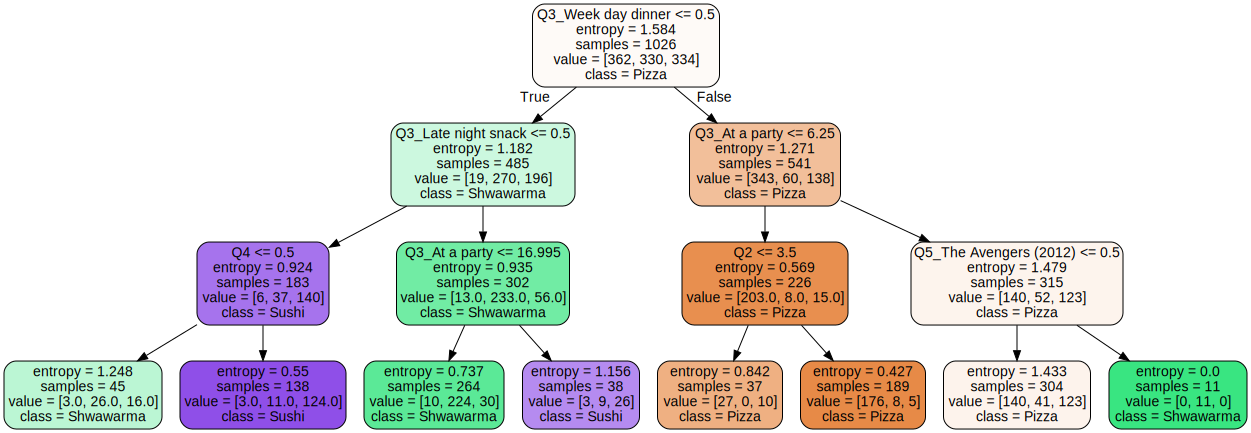

In [ ]:
# TODO: call visualize_tree on the tree that was fit
visualize_tree(tree)

If this is done correctly, you should see your decision tree rendered above in your notebook.

We will now explore some hyperparameter choices that may cause our decision tree to underfit or overfit our data. Recall that overfitting means that, while our model may accurately capture relationships between inputs and our classification target in training data, it may not capture such relationships in the validation data. By contrast, underfitting occurs when our model lacks the complexity to model relationships in either training or validation data.  

**Task:** Similar to what you did above, create another `DecisionTreeClassifier` that uses `entropy` to measure the quality of a split. Set the `max_depth` to a value that will cause the tree to *underfit*. Report the accuracy on the validation and training sets. Visualize the tree by calling `visualize_tree`.

Training Accuracy: 0.5974658869395711
Validation Accuracy: 0.5889967637540453


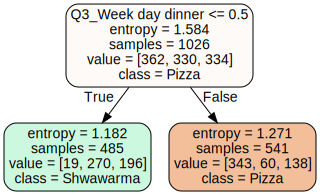

In [ ]:
# TODO: create a DecisionTreeClassifier# Creating a DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# TODO: fit it to our data
tree.fit(X_train, t_train)

# Print the training and validation accuracy
print("Training Accuracy:", tree.score(X_train, t_train))
print("Validation Accuracy:", tree.score(X_valid, t_valid))

# TODO: visualize the tree
visualize_tree(tree)

**Task:** Repeat the same computation as above, but set the `max_depth` to a value that will cause the tree to *overfit*. When using `visualize_tree` to visualize the tree, leave the default max depth parameter as 5.

Training Accuracy: 1.0
Validation Accuracy: 0.7184466019417476


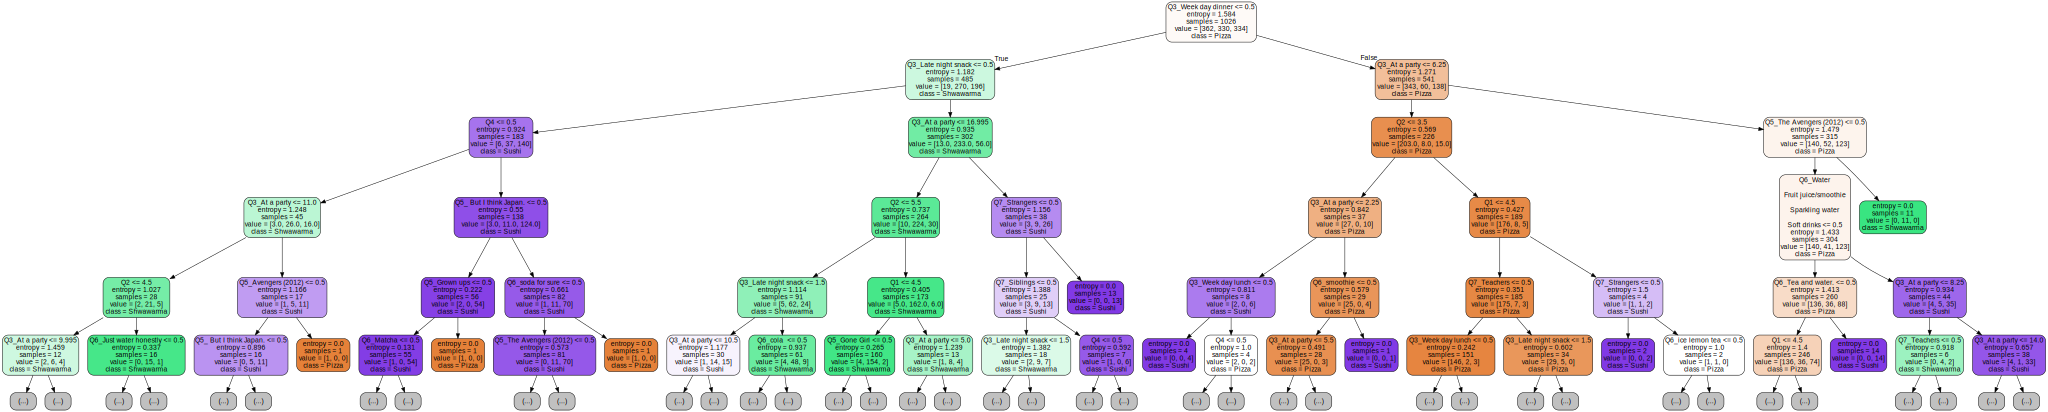

In [ ]:
# create a DecisionTreeClassifier# Creating a DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=30)

# fit it to our data
tree.fit(X_train, t_train)

# Print the training and validation accuracy
print("Training Accuracy:", tree.score(X_train, t_train))
print("Validation Accuracy:", tree.score(X_valid, t_valid))

# visualize the tree
visualize_tree(tree, max_depth=5)

We will now repeat the same computation as above, but vary the `min_samples_split` parameter instead of `max_depth`.

**Task:** Similar to what we've been doing above, create another `DecisionTreeClassifier` that uses `entropy` to measure the quality of a split. This time set `min_samples_split` to a value that would cause the tree to *underfit*.  Omit the `max_depth` parameter. Report the accuracy (obtained via the `score()` method) on the validation and training sets. Visualize the tree.

Training Accuracy: 0.5974658869395711
Validation Accuracy: 0.5889967637540453


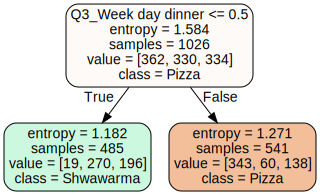

In [ ]:
# create a DecisionTreeClassifier# Creating a DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=0.75)

# fit it to our data
tree.fit(X_train, t_train)

# Print the training and validation accuracy
print("Training Accuracy:", tree.score(X_train, t_train))
print("Validation Accuracy:", tree.score(X_valid, t_valid))

# visualize the tree
visualize_tree(tree)

**Task:** Repeat the same thing you did above. Set `min_samples_split` to a value that would cause the tree to *overfit*. Omit the `max_depth` parameter. Report the accuracy on the validation and training sets. When using `visualize_tree` to visualize the tree, you can leave the default max depth parameter as 5.

Training Accuracy: 1.0
Validation Accuracy: 0.7475728155339806


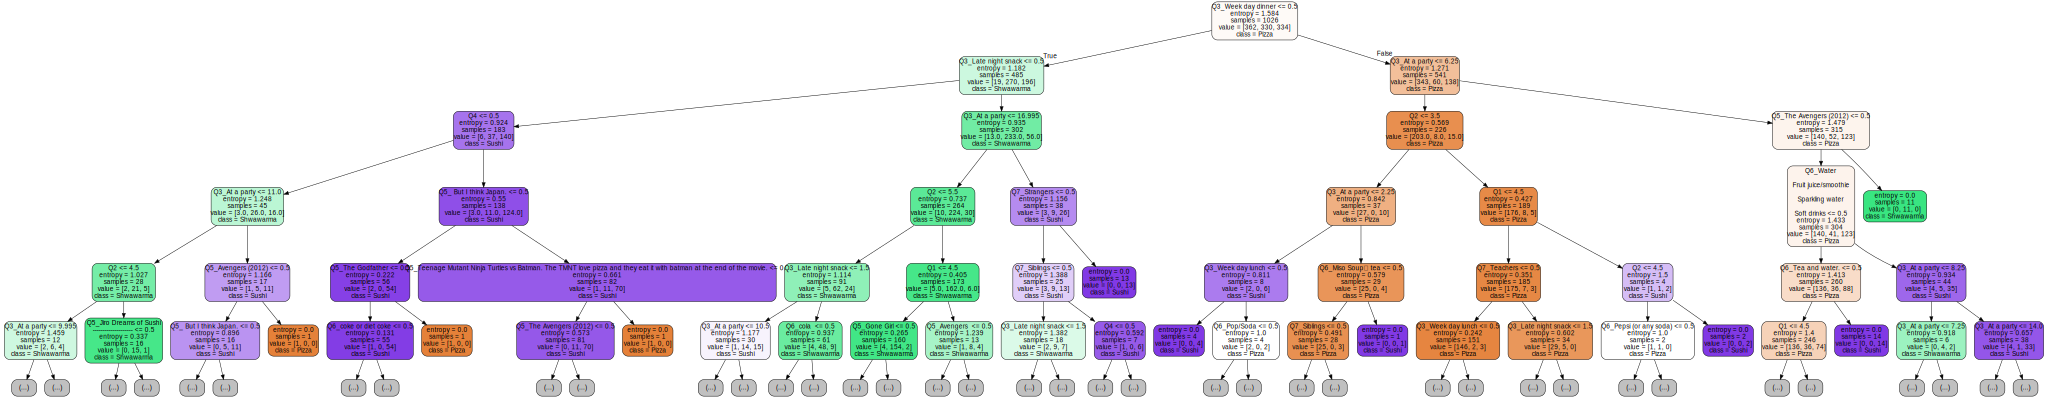

In [ ]:
# create a DecisionTreeClassifier# Creating a DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=2)

# fit it to our data
tree.fit(X_train, t_train)

# Print the training and validation accuracy
print("Training Accuracy:", tree.score(X_train, t_train))
print("Validation Accuracy:", tree.score(X_valid, t_valid))

# visualize the tree
visualize_tree(tree)

## Part 3. Hyperparameter Tuning

So far, we have experimented with two Decision Tree hyperparameters: `max_depth` and `min_samples_split`. Another hyperparameter we can vary is the `criterion` for measuring split quality. In lecture, and earlier in this lab, we used `entropy` as the criterion. Another criterion that Sklearn supports is `gini` (Gini impurity index). You don't need to know the implementation details behind this as we'll rely on Sklearn to compute it. However, if you are interested in learning more about this alternative impurity index, we encourage you to [read more about it](https://en.wikipedia.org/wiki/Gini_coefficient).

Thus, our goal is now to figure out what combination of `max_depth`, `min_samples_split` and `criterion` results in the "best" decision tree. It is up to you to determine what "best" means in this context.

**Graded Task:** Start by completing `build_all_models` based on the function specification.
This function builds many trees, one for each combination of hyperparameters, and
then compares them.

In [ ]:
def build_all_models(max_depths,
                     min_samples_split,
                     criterion,
                     X_train=X_train,
                     t_train=t_train,
                     X_valid=X_valid,
                     t_valid=t_valid):
    """
    Parameters:
        `max_depths` - A list of values representing the max_depth values to be
                       try as hyperparameter values
        `min_samples_split` - An list of values representing the min_samples_split
                       values to try as hyperpareameter values
        `criterion` -  A string; either "entropy" or "gini"

    Returns a dictionary, `out`, whose keys are the the hyperparameter choices, and whose values are
    the training and validation accuracies (via the `score()` method).
    In other words, out[(max_depth, min_samples_split)]['val'] = validation score and
                    out[(max_depth, min_samples_split)]['train'] = training score
    For that combination of (max_depth, min_samples_split) hyperparameters.
    """
    out = {}

    for d in max_depths:
        for s in min_samples_split:
            out[(d, s)] = {}
            # Create a DecisionTreeClassifier based on the given hyperparameters and fit it to the data
            tree =  DecisionTreeClassifier(criterion=criterion, max_depth=d, min_samples_split=s)
            tree.fit(X_train, t_train)

            # TODO: store the validation and training scores in the `out` dictionary
            out[(d, s)]['val'] = tree.score(X_valid, t_valid) # TODO
            out[(d, s)]['train'] = tree.score(X_train, t_train) # TODO
    return out

**Graded Task:** In this task, we will use an approach called **grid search** to
tune hyperparameters: we will list possible values for each hyperparameter,
and then attempt every combination of hyperparameter choices. In our case,
we will start with some possible values for `max_depth`, `min_samples_split` and `criterion`. Then we will try all combinations
of these hyperparameter choices.

Complete the code below that performs grid search, by using `build_all_models`
to build models and evaluate hyperparameter choices.
Print the best parameters and corresponding scores (accuracy) for each of
criterion=entropy and criterion=gini (i.e. you should have 2 print statements, 1 for each criterion).

In [ ]:
# Hyperparameters values to try in our grid search
criterions = ["entropy", "gini"]
max_depths = [1, 5, 10, 15, 20, 25, 30, 50, 100]
min_samples_split = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

for criterion in criterions:
    print("\nUsing criterion {}".format(criterion))
    res = build_all_models(max_depths, min_samples_split, criterion)

    # TODO: complete this loop which should search for the optimal
    #  (max_depth, min_samples_split) given this criterion
    best_acc = 0
    best_crit = None
    for d, s in res:
      if res[(d, s)]['val'] > best_acc:
        best_acc = res[(d, s)]['val']
        best_crit = (d, s)
    print("Best depth: ", best_crit[0], ". Best samples: ", best_crit[1], ". Accuracy: ", best_acc)



Using criterion entropy
Best depth:  10 . Best samples:  128 . Accuracy:  0.7734627831715211

Using criterion gini
Best depth:  10 . Best samples:  8 . Accuracy:  0.8122977346278317


## Part 4. Test accuracy

**Task:** Use the optimal set of hyperparameters you previously discovered to fit a new Decision Tree model to the data. Report the test score.

In [ ]:
best_tree = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=14)
best_tree.fit(X_train, t_train)
print(best_tree.score(X_valid, t_valid))

0.8155339805825242


The accuracy measure above considers every mis-classification that is made by our model an `error`, and it assumes that each and every error is of equal importance. However, in many domains, not all errors are of equal importance at all! Some mistakes may have significant negative impacts on people, while others may not.  In future labs, we'll look more closely at different kinds of errors that our models may make and reflect on how these errors might be related to risks.

For now, however, let's simply reflect on some shortcomings of the accuracy measure above.